# The Sparks Foundation

# GRIPJULY'21 Task-1 (Data Science and Business Analytics)

# Task 1: Prediction using supervised ML

To develop a model in order to predict the percentage of marks that a student is expected to score given the no. of study hours.

# Algorithm: Simple Linear Regression

We will be using simple linear regression for this task as it involves only two variables.

# Author: Aditya Mukherjee

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Importing the dataset

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print('Data imported successfully')

Data imported successfully


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Performing Explorary Data Analysis(EDA)

We will check if there is any relationship between "Hours of study" amd "Scores of a student" using Descriptive Statistics and Visualisation. 

In [4]:
# Descriptive Statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:

sns.set(style= 'darkgrid')

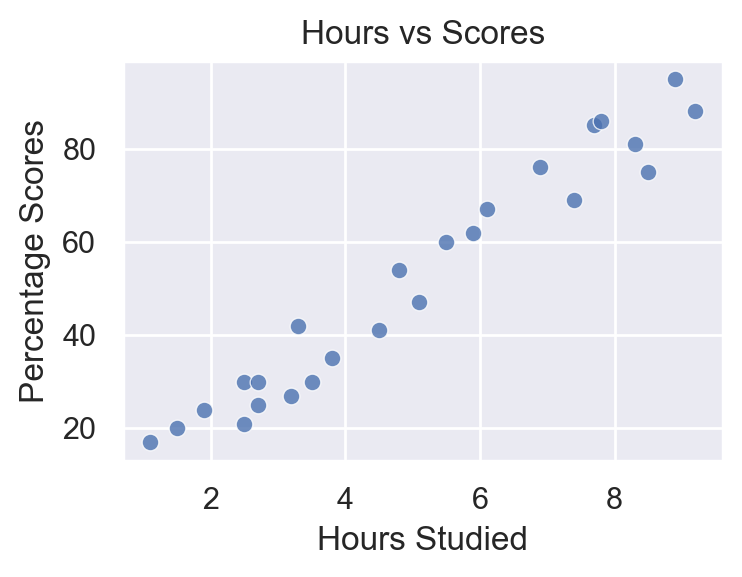

In [7]:
# Create a figure using matplotlib library
fig = plt.figure(figsize=(3,2), dpi=200)

# Add axes
axes = fig.add_axes([0,0,1,1])

# Add labels and title
axes.set_xlabel('Hours Studied')
axes.set_ylabel('Percentage Scores')
axes.set_title('Hours vs Scores')

# scatterplot using seaborn library
sns.scatterplot(x='Hours', y='Scores', data = data, alpha=0.8)

plt.show()

# Distribution of data

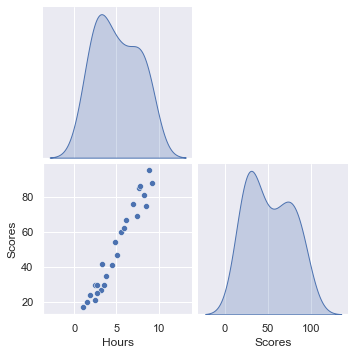

In [8]:
sns.pairplot(data, diag_kind = 'kde', corner= True)

plt.show()

# Introducing Scikit Learn for Creating a Linear Regression Model

# Separate the data into features(input) and labels(output)



In [9]:
# Feature (Hours)
X = data.drop('Scores',axis=1)

# label (Scores)
y = data['Scores']

# Train|Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.18, random_state=42)

# Training the algorithm

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Slope coefficient
model.coef_

array([9.68207815])

In [16]:
# Intercept Coef
model.intercept_

2.826892353899737

# Plotting Regression Line

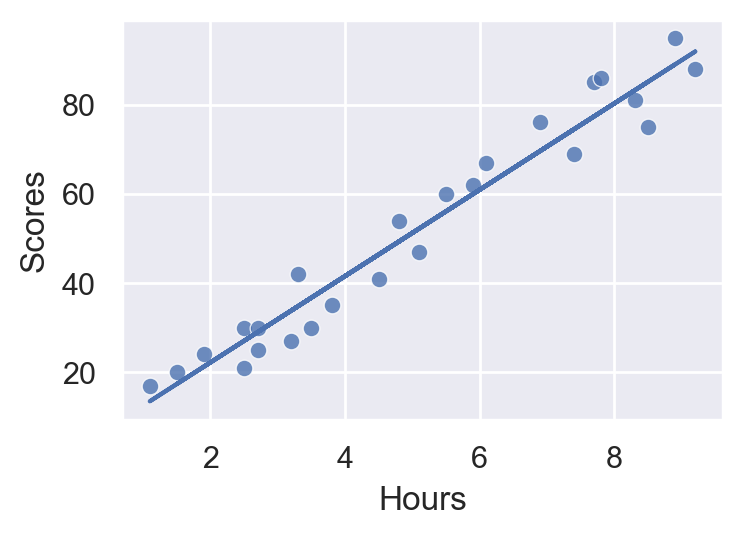

In [17]:
fig = plt.figure(figsize=(3,2), dpi=200)
axes = fig.add_axes([0,0,1,1])

# Regression Line
line = model.intercept_ + model.coef_*X

#plot
axes.plot(X, line)
sns.scatterplot(x='Hours', y='Scores', data=data,  ax=axes, alpha=0.8)

plt.show()

# Predicting the testing test

In [18]:
y_pred = model.predict(X_test)

In [19]:
Prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [20]:
Prediction

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


# Evaluating the model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred)

# Mean Squarred error
MSE = mean_squared_error(y_test, y_pred)

# Root mean squarred error
RMSE = np.sqrt(MSE)

In [23]:
MAE

3.9207511902099244

In [24]:
RMSE

4.352380006653288

# Retraining the model on full data

Now we are satisfied with the model, so we will retrain it on the full data.

In [25]:
final_model = LinearRegression()

In [26]:
final_model.fit(X,y)

LinearRegression()

In [27]:
reg_coef = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
reg_coef = reg_coef.append(pd.DataFrame(final_model.intercept_, index = ['intercept'], columns = ['Coefficient']))

print('Regression coefficients')
reg_coef

Regression coefficients


,Coefficient
Hours,9.775803
intercept,2.483673


# Plotting the Regression Line

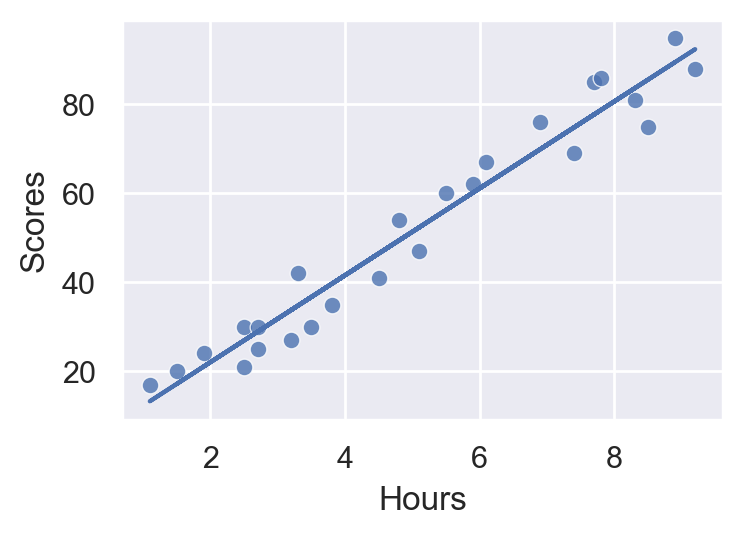

In [28]:
fig = plt.figure(figsize=(3,2), dpi=200)
axes = fig.add_axes([0,0,1,1])

# Regression Line
line = final_model.intercept_ + final_model.coef_*X

#plot
axes.plot(X, line)
sns.scatterplot(x='Hours', y='Scores', data=data,  ax=axes, alpha=0.8)

plt.show()

# Making Prediction

What will be the predicted score if a student studies for 9.25hrs/day ?

In [29]:
pred_score = final_model.predict([[9.25]])

print('if a student studies for 9.25 hrs/day, then the predicted score would be {}'.format(pred_score[0]))

if a student studies for 9.25 hrs/day, then the predicted score would be 92.9098547701573


# Task 1 Completed !